In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Lista

In [2]:
def impares(lista):
    impares = [i for i in lista if i % 2 != 0]
    impares.sort(reverse=True)
    return impares[0:5]

In [3]:
lista_uniform = list(np.random.randint(1, 201, 50))
print(lista_uniform)

[158, 150, 26, 87, 197, 84, 134, 133, 45, 82, 26, 151, 130, 46, 45, 87, 114, 70, 4, 194, 106, 131, 156, 103, 8, 50, 80, 22, 19, 159, 160, 134, 152, 139, 91, 92, 172, 113, 177, 199, 168, 124, 66, 183, 56, 194, 127, 197, 129, 44]


In [4]:
impares(lista_uniform)

[199, 197, 197, 183, 177]

## Portafolio

In [6]:
def get_data(stocks, start_date, end_date):
    prices = yf.download(stocks, start_date, end_date, progress = False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    cov_returns = returns.cov()
    return mean_returns, cov_returns, prices

def simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights):

    N = 10000
    portfolio_return = np.dot(weights, mean_returns)

    portfolio_simulated_returns = np.zeros((num_dias, N)) # filas x columnas
    mean_returns = np.full(shape = (num_dias, len(stocks)), fill_value=portfolio_return)

    for m in range(N):
        L = np.linalg.cholesky(cov_returns)
        Z = np.random.normal(size=(num_dias, len(stocks))) # Matriz de n_dias (filas) y n_stocks (columnas)
        daily_returns = mean_returns.T + np.dot(L, Z.T)
        portfolio_simulated_returns [:, m] = np.cumprod(np.dot(weights, daily_returns) + 1)
    
    return portfolio_simulated_returns

In [7]:
stocks = ['KO','MCD']
weights = [0.5, 0.5]
start_date = '2022-03-08'
end_date = '2025-03-08'
num_dias = 90

In [8]:
mean_returns, cov_returns, prices = get_data(stocks, start_date, end_date)
portafolios_simulados = simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights)

YF.download() has changed argument auto_adjust default to True


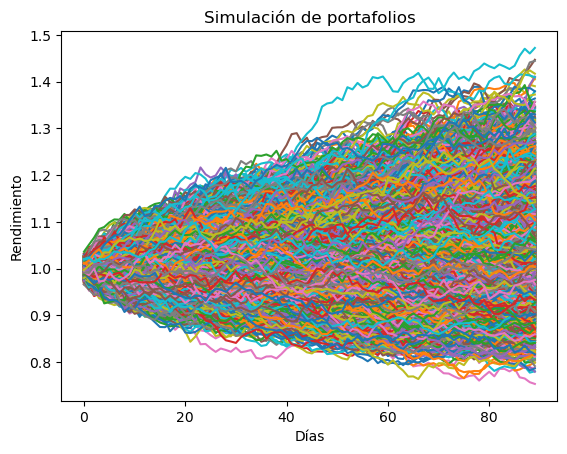

In [9]:
plt.plot(portafolios_simulados)
plt.ylabel('Rendimiento')
plt.xlabel('Días')
plt.title('Simulación de portafolios')
plt.show()

In [17]:
min_value = 10000 * portafolios_simulados[-1].min()
max_value = 10000 * portafolios_simulados[-1].max()

min_value, max_value

(7534.593255693774, 14723.735483202827)

In [25]:
pnl = portafolios_simulados[-1] - 1

In [26]:
var = np.percentile(pnl, 5)
var

-0.09298793350061031

Máximo a perder en 90 días con un 95% de confianza es 9.29 % que serían 929 dólares

In [30]:
cvar = pnl[pnl < var].mean()
cvar

-0.1244207138127295